# How to Connect to MySQL Database in Python ?

### 1. Install MySQL connector module
    pip install mysql-connector-python


### 2. Import MySQL connector module
    Import using a import mysql.connector statement so you can use this module’s methods to communicate with the MySQL database.


### 3. Use the connect() method
    Use the connect() method of the MySQL Connector class with the required arguments to connect MySQL. It would return a MySQLConnection object if the connection established successfully


### 4. Use the cursor() method
    Use the cursor() method of a MySQLConnection object to create a cursor object to perform various SQL operations.


### 5. Use the execute() method
    The execute() methods run the SQL query and return the result.


### 6. Extract result using fetchall()
    Use cursor.fetchall() or fetchone() or fetchmany() to read query result.
    
    fetchall(): Retrieves all rows from a query result set as a list of tuples.

    fetchone(): Retrieves the next row from a query result set as a tuple or returns None if there are no more rows.

    fetchmany(size): Retrieves the next set of rows (specified by the size parameter) from a query result set as a list of tuples or returns an empty list if there are no more rows.

### 7. Close cursor and connection objects
    use cursor.clsoe() and connection.clsoe() method to close open connections after your work completes



<img src="python_mysql_connection.png" width="600">

In [56]:
pip install mysql-connector-python


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
#import
import mysql.connector

In [58]:
connection=mysql.connector.connect(host='localhost',user='root',password='root',database='organization')

In [59]:
if connection.is_connected():
    print("Connected successfully....")

Connected successfully....


In [60]:
cursor=connection.cursor()

In [61]:
cursor

In [62]:
cursor.execute("Show tables")

In [63]:
cursor.fetchone()

('books',)

In [64]:
cursor.fetchmany(size=3)

[('course_details',), ('department',), ('department_details',)]

In [88]:
cursor.execute('select * from student')

In [89]:
student=cursor.fetchall()

In [90]:
for s in student:
    print(s)

(1, 'John', 'Doe', 21, 'f', 'nutrition', 999999999, 24000)
(2, 'Jane', 'Smith', 22, 'F', 'photography', 888888888, 35000)
(100, 'Alex', 'Johnson', 20, 'M', 'music', 777777777, 45000)
(101, 'Emily', 'Davis', 22, 'm', 'music', 666666666, 22000)
(102, 'Michael', 'Brown', 22, 'M', 'nutrition', 55555555, 22000)
(103, 'Alice', 'Johnson', 20, 'F', 'photography', 444444444, None)
(106, 'Hary', 'James', 21, 'F', 'photography', 22222222, 38000)
(107, 'Tom', 'Davis', 20, 'F', 'music', 466666666, 28000)


In [91]:
print(type(student))

<class 'list'>


In [92]:
cursor.execute("select concat(fname,' ',lname) from student")

In [93]:
cursor.fetchall()

[('John Doe',),
 ('Jane Smith',),
 ('Alex Johnson',),
 ('Emily Davis',),
 ('Michael Brown',),
 ('Alice Johnson',),
 ('Hary James',),
 ('Tom Davis',)]

In [94]:
cursor.execute("select fname,elective_course from student")

In [101]:
cursor.fetchall()

[('John', 'Doe'),
 ('Jane', 'Smith'),
 ('Alex', 'Johnson'),
 ('Emily', 'Davis'),
 ('Michael', 'Brown'),
 ('Alice', 'Johnson'),
 ('Hary', 'James'),
 ('Tom', 'Davis')]

In [102]:
# As you fetch all , there is nothing to fetch more 
cursor.fetchall()

[]

In [103]:
cursor.execute("select fname,lname from student")

In [104]:
cursor.fetchall()

[('John', 'Doe'),
 ('Jane', 'Smith'),
 ('Alex', 'Johnson'),
 ('Emily', 'Davis'),
 ('Michael', 'Brown'),
 ('Alice', 'Johnson'),
 ('Hary', 'James'),
 ('Tom', 'Davis')]

In [105]:
#closing the cursor and connection
cursor.close()
connection.close()

## commit()

- The commit() method in Python is used to save changes made within a database transaction, ensuring that modifications, such as inserts or updates, become permanent.

- The syntax involves calling commit() on the database connection object, like this: connection.commit().

## Creating a new database

In [107]:
import mysql.connector

# Create a connection
connection=mysql.connector.connect(host='localhost',user='root',password='root')

# Create a cursor to execute SQL queries
cursor = connection.cursor()

new_database = "Library_management_system"

# Create a new database
cursor.execute(f"CREATE DATABASE {new_database}")

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

## Creating a new table

In [1]:
import mysql.connector

# Create a connection
connection=mysql.connector.connect(host='localhost',user='root',password='root', database="Library_management_system")

if connection.is_connected():
    print("Connected successfully....")
    
# Create a cursor to execute SQL queries
cursor = connection.cursor()

# Create a new table
cursor.execute("create table books (id int primary key, name varchar(25))")

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

Connected successfully....


<img src="table.png" width="600">

## Insert values 

In [5]:
import mysql.connector

# Create a connection
connection=mysql.connector.connect(host='localhost',user='root',password='root', database="Library_management_system")

if connection.is_connected():
    print("Connected successfully....")
    
# Create a cursor to execute SQL queries
cursor = connection.cursor()

# Create a new table
cursor.execute("insert into books values(101,'Book A'),(102,'Book B'),(103,'Book C')")

# Commit the changes
connection.commit()

cursor.execute("select * from books")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Close the cursor and connection
cursor.close()
connection.close()

Connected successfully....
(101, 'Book A')
(102, 'Book B')
(103, 'Book C')


<img src="books_table.png" width=500>

## Advantages of connecting MySQL with Python

Connecting MySQL with Python offers several advantages.

- Python, along with libraries like Pandas and NumPy, provides powerful tools for data analysis and manipulation. Once data is retrieved from MySQL, you can use Python for tasks such as filtering, aggregating, and transforming data.

- Python has libraries like Matplotlib, Seaborn, and Plotly for creating visualizations. You can use these libraries to visualize data extracted from MySQL, making it easier to interpret and communicate insights.

In [4]:
# Import necessary libraries
import mysql.connector
import pandas as pd

#connect to mysql database
connection=mysql.connector.connect(host='localhost',user='root',password='root',database='organization')

# Define a SQL query to retrieve data
sql_query = "SELECT * FROM student"

# Use Pandas to read the data directly into a DataFrame
df = pd.read_sql_query(sql_query, connection)

# Close the database connection
connection.close()

# Display the first few rows of the DataFrame
print(df.head())

   rollno    fname    lname  age gender elective_course    contact  f_income
0       1     John      Doe   21      f       nutrition  999999999   24000.0
1       2     Jane    Smith   22      F     photography  888888888   35000.0
2     100     Alex  Johnson   20      M           music  777777777   45000.0
3     101    Emily    Davis   22      m           music  666666666   22000.0
4     102  Michael    Brown   22      M       nutrition   55555555   22000.0


C:\Users\jisma\AppData\Local\Temp\ipykernel_7384\3225629289.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, connection)


In [2]:
df

,rollno,fname,lname,age,gender,elective_course,contact,f_income
0,1,John,Doe,21,f,nutrition,999999999,24000.0
1,2,Jane,Smith,22,F,photography,888888888,35000.0
2,100,Alex,Johnson,20,M,music,777777777,45000.0
3,101,Emily,Davis,22,m,music,666666666,22000.0
4,102,Michael,Brown,22,M,nutrition,55555555,22000.0
5,103,Alice,Johnson,20,F,photography,444444444,NaN
6,106,Hary,James,21,F,photography,22222222,38000.0
7,107,Tom,Davis,20,F,music,466666666,28000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rollno           8 non-null      int64  
 1   fname            8 non-null      object 
 2   lname            8 non-null      object 
 3   age              8 non-null      int64  
 4   gender           8 non-null      object 
 5   elective_course  8 non-null      object 
 6   contact          8 non-null      int64  
 7   f_income         7 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 640.0+ bytes


In [8]:
df['gender'].value_counts()

gender
F    4
M    2
f    1
m    1
Name: count, dtype: int64

In [12]:
df1=df.drop([0,3])
df1

,rollno,fname,lname,age,gender,elective_course,contact,f_income
1,2,Jane,Smith,22,F,photography,888888888,35000.0
2,100,Alex,Johnson,20,M,music,777777777,45000.0
4,102,Michael,Brown,22,M,nutrition,55555555,22000.0
5,103,Alice,Johnson,20,F,photography,444444444,NaN
6,106,Hary,James,21,F,photography,22222222,38000.0
7,107,Tom,Davis,20,F,music,466666666,28000.0


In [13]:
df['elective_course'].value_counts()

elective_course
photography    3
music          3
nutrition      2
Name: count, dtype: int64

In [15]:
df.isnull().sum()

rollno             0
fname              0
lname              0
age                0
gender             0
elective_course    0
contact            0
f_income           1
dtype: int64

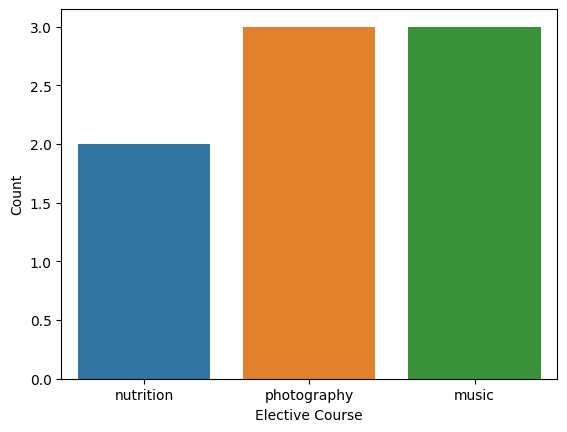

In [17]:
# Visualize elective course
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(x='elective_course', data=df)
plt.xlabel('Elective Course')
plt.ylabel('Count')
plt.show()

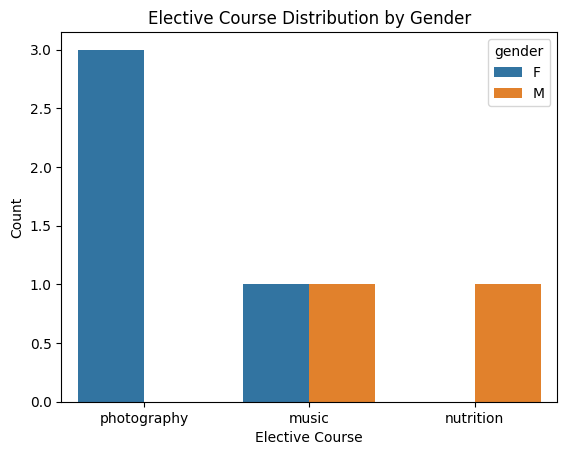

In [21]:
# Visualize elective course distribution by gender
sns.countplot(x='elective_course', hue='gender', data=df1)
plt.title('Elective Course Distribution by Gender')
plt.xlabel('Elective Course')
plt.ylabel('Count')
plt.show()

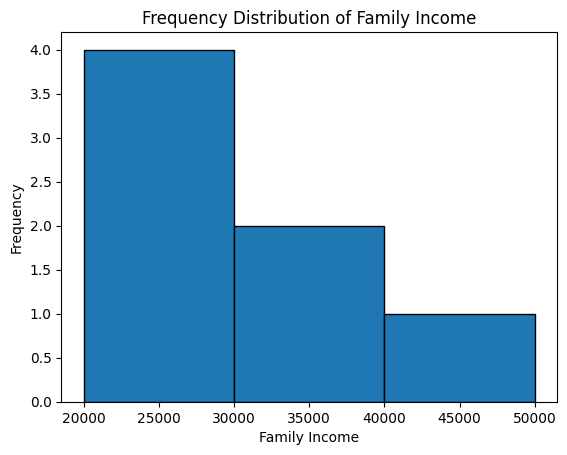

In [32]:
#visualize frequency distribution of f_income

import matplotlib.pyplot as plt

income_data = df['f_income'].dropna()

plt.hist(income_data,bins=[20000,30000,40000,50000],edgecolor='black')
plt.title('Frequency Distribution of Family Income')
plt.xlabel('Family Income')
plt.ylabel('Frequency')
plt.show()